# **EAS2655 lab report 1**
#### **Author**: Taka Ito
#### Email: taka.ito@eas.gatech.edu

Overview
- The learning objective of this lab is to gain essential skills in reading/processing data and display graphic results. Below are the steps in this project.
1. Import the data into Python
2. Calculate and display the mean, median, standard deviation and IQR.
3. Plot the monthly mean temperature as a function of time
4. Generate the histogram
5. Generate Box diagram for each of the 12 months and plot them together in a single panel using month as the x-axis.

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
# mount google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### 1. Import data into python

In [5]:
# read in temperature data
data = np.genfromtxt('/content/drive/MyDrive/EAS2655_4821/boston.csv',
                     delimiter=',',skip_header=1)

In [13]:
# make temperature as masked array
temp = data[:,1:13].copy()
missing = np.where(temp==-999,True,False)
temp_masked = np.ma.array(temp,mask=missing)
# pick January
year=data[:,0]
Jan=temp_masked[:,0]

### 2. Calculate mean, median, std, IQR and display them

In [19]:
Tmean = np.mean(Jan)
Tstd = np.std(Jan)
Tmedian = np.percentile(Jan,50)
TIQR = np.percentile(Jan,75)-np.percentile(Jan,25)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [23]:
print('Mean Jan temperature of Boston is '+str(Tmean)[:4]+' deg F. ')
print('STD of Jan temperature in Boston is '+str(Tstd)[:4]+' deg F. ')

Mean Jan temperature of Boston is 29.1 deg F. 
STD of Jan temperature in Boston is 4.37 deg F. 


### 3. Plot time series of Boston temperature

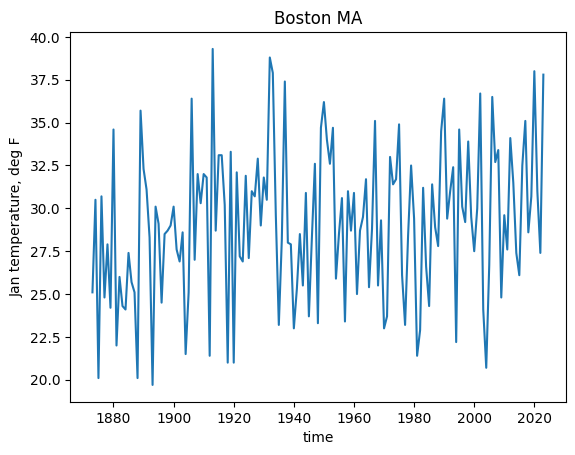

In [28]:
plt.plot(year,Jan)
plt.xlabel('time')
plt.ylabel('Jan temperature, deg F')
plt.title('Boston MA')
plt.savefig('/content/drive/MyDrive/EAS2655_4821/Figure1.pdf',bbox_inches='tight')

### 4. Plot the histogram of the data

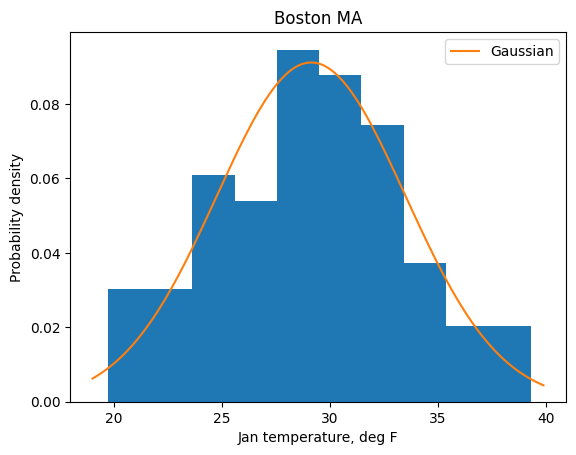

In [36]:
n,bins,patches=plt.hist(Jan,density=True)
# gaussian function
x = np.arange(19,40,.1)
g = 1/(np.sqrt(2*np.pi)*Tstd)*np.exp(-1/2*((x-Tmean)/Tstd)**2)
plt.plot(x,g,label='Gaussian')
plt.legend()
plt.xlabel('Jan temperature, deg F')
plt.ylabel('Probability density')
plt.title('Boston MA')
plt.savefig('/content/drive/MyDrive/EAS2655_4821/Figure2.pdf',bbox_inches='tight')

### 5. Generate box plot

In [44]:
# replace bad data with mean
mean_temp = np.mean(temp_masked,axis=0)
temp_masked2 = np.where(temp==-999,mean_temp,temp)

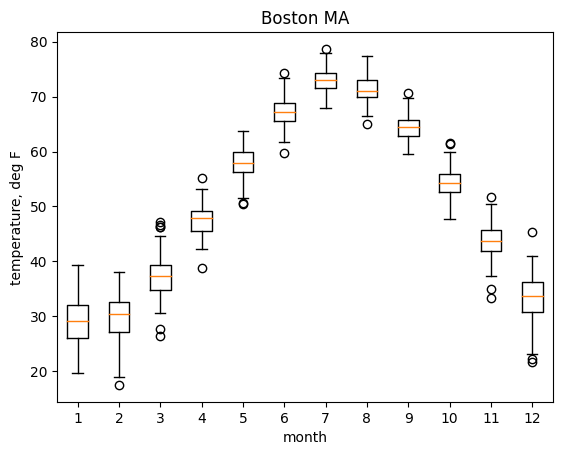

In [50]:
# generate box plot
plt.boxplot(temp_masked2)
plt.xlabel('month')
plt.ylabel('temperature, deg F')
plt.title('Boston MA')
plt.show()